In [1]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from OpenSSL.crypto import OpenSSL_add_all_algorithms


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('mnist.h5')
print("Saving the model as mnist.h5")

from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np


model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0
        
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Draw..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting)   
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
       
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()  # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND)  # get the coordinate of the canvas
        a,b,c,d = rect
        rect=(a+4,b+4,c-4,d-4)
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
       
app = App()
mainloop()


AttributeError: module 'lib' has no attribute 'OpenSSL_add_all_algorithms'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras import layers,datasets,models
from  tensorflow.keras.models import Sequential

AttributeError: module 'lib' has no attribute 'OpenSSL_add_all_algorithms'

In [1]:
(train_images,train_labels),(test_images,test_labels)= datasets.mnist.load_data()
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)
train_images,test_images = train_images/255.0,test_images/255.0
print("TRAIN IMAGES ", train_images.shape)
print("TEST IMAGES " , test_images.shape)


NameError: name 'datasets' is not defined

In [8]:
num_classes = 10
img_height = 28
img_width = 28

model=Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='sigmoid')
    
    
    
    
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0

In [12]:
epochs = 10
history= model.fit(
train_images,
train_labels,
epochs=epochs)


Epoch 1/10


C:\Users\prity\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 134s 70ms/step - loss: 0.1360 - accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0465 - accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0330 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 530s 283ms/step - loss: 0.0253 - accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0203 - accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0157 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 314s 167ms/step - loss: 0.0131 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 130s 70ms/step - loss: 0.0120 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0095 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 130s 69

Text(0.5, 1.0, 'training accuracy and loss')

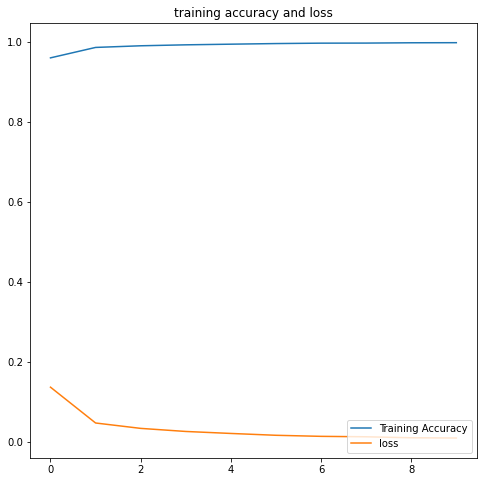

In [13]:
acc=history.history['accuracy']
loss=history.history['loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,loss,label='loss')
plt.legend(loc='lower right')
plt.title('training accuracy and loss')

prediction of model : [1.0000000e+00 1.5818130e-06 4.7434308e-04 1.2301131e-05 7.0971642e-03
 8.3521445e-05 3.4410246e-02 4.2827143e-03 5.5246874e-06 1.8974544e-02]


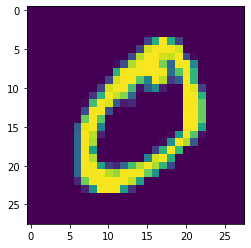

In [22]:
image = (train_images[1]).reshape(1,28,28,1)
model_pred = model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))


prediction of model : [6.6334520e-09 1.0022489e-01 3.2763287e-02 5.2780160e-07 1.0000000e+00
 8.5352948e-03 4.8493817e-03 7.7326185e-05 3.6782406e-02 3.2696307e-02]


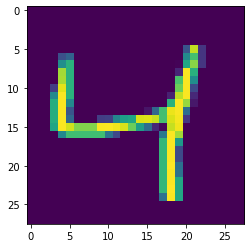

In [24]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))

prediction of model : [1.4976361e-07 1.0000000e+00 1.3707626e-03 1.4531487e-09 1.1902291e-02
 8.4605400e-04 1.0900901e-04 5.8467162e-01 3.3332165e-02 9.4331144e-06]


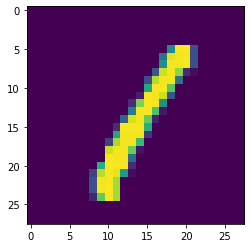

In [28]:
image = (train_images[3]).reshape(1,28,28,1)
model_pred = model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))

prediction of model : [2.9833848e-07 8.9184282e-04 1.9319694e-05 3.4511581e-04 9.9968851e-01
 3.9571984e-04 4.0704990e-07 2.7308891e-02 8.1286299e-01 9.9999988e-01]


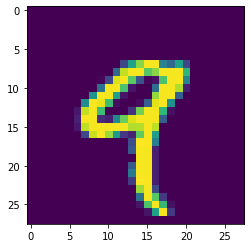

In [29]:
image = (train_images[4]).reshape(1,28,28,1)
model_pred = model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))

prediction of model : [1.4175899e-01 9.4577640e-02 1.0000000e+00 8.0967240e-02 2.4720743e-01
 1.0149399e-05 4.1823027e-05 2.0211106e-03 3.1980455e-02 4.2586550e-04]


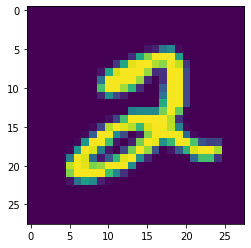

In [30]:
image = (train_images[5]).reshape(1,28,28,1)
model_pred = model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))

prediction of model : [5.4291842e-09 1.0000000e+00 7.5899261e-05 5.5532701e-06 5.7488555e-01
 3.4406600e-03 1.0364972e-02 2.9722715e-03 4.7176211e-05 2.7675367e-06]


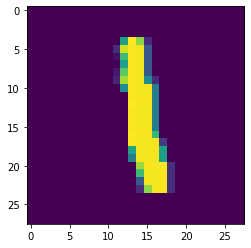

In [31]:
image = (train_images[6]).reshape(1,28,28,1)
model_pred = model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))

prediction of model : [3.4496260e-08 3.5049509e-02 2.9817976e-02 1.0000000e+00 3.9499196e-07
 2.6984516e-01 1.8643499e-07 6.4267677e-01 2.0427351e-01 2.4313744e-02]


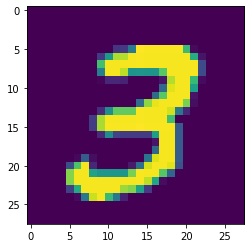

In [32]:
image = (train_images[7]).reshape(1,28,28,1)
model_pred = model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))

prediction of model : [7.4132026e-06 9.9999982e-01 7.4222858e-06 9.4988518e-06 4.5126036e-02
 1.1675026e-02 1.1454347e-03 2.5256513e-02 3.5019198e-06 3.2126158e-04]


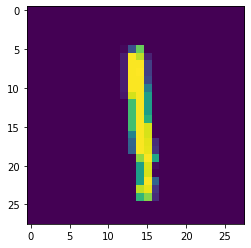

In [33]:
image = (train_images[8]).reshape(1,28,28,1)
model_pred = model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))

prediction of model : [1.9184820e-09 9.1646075e-01 9.8977369e-01 2.6746276e-08 1.0000000e+00
 2.7384025e-01 3.2060989e-04 3.3392796e-01 8.1612505e-02 1.5605243e-09]


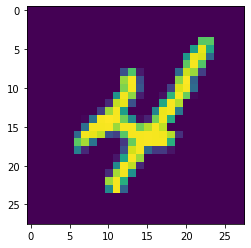

In [34]:
image = (train_images[9]).reshape(1,28,28,1)
model_pred = model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))

prediction of model : [3.4873452e-07 3.3990875e-02 6.4088693e-03 9.9999976e-01 1.2194339e-05
 7.1747947e-01 3.5564150e-07 1.1918228e-02 1.4186154e-01 8.8407904e-01]


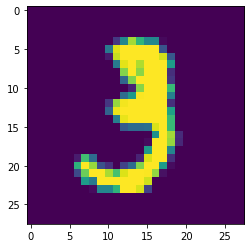

In [35]:
image = (train_images[10]).reshape(1,28,28,1)
model_pred = model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))

prediction of model : [2.7332730e-06 2.2625711e-03 2.7504335e-08 9.9979699e-01 3.3593582e-07
 9.9999911e-01 4.1395607e-03 2.3661103e-06 7.1090083e-03 2.6073225e-04]


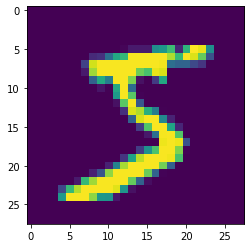

In [36]:
image = (train_images[0]).reshape(1,28,28,1)
model_pred = model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))

test images array shape :(4, 28, 28)
predicted digits : [2.7332730e-06 2.2625711e-03 2.7504335e-08 9.9979699e-01 3.3593582e-07
 9.9999911e-01 4.1395607e-03 2.3661103e-06 7.1090083e-03 2.6073225e-04]
predicted digits : [2.7332730e-06 2.2625711e-03 2.7504335e-08 9.9979699e-01 3.3593582e-07
 9.9999911e-01 4.1395607e-03 2.3661103e-06 7.1090083e-03 2.6073225e-04]
predicted digits : [2.7332730e-06 2.2625711e-03 2.7504335e-08 9.9979699e-01 3.3593582e-07
 9.9999911e-01 4.1395607e-03 2.3661103e-06 7.1090083e-03 2.6073225e-04]
predicted digits : [2.7332730e-06 2.2625711e-03 2.7504335e-08 9.9979699e-01 3.3593582e-07
 9.9999911e-01 4.1395607e-03 2.3661103e-06 7.1090083e-03 2.6073225e-04]


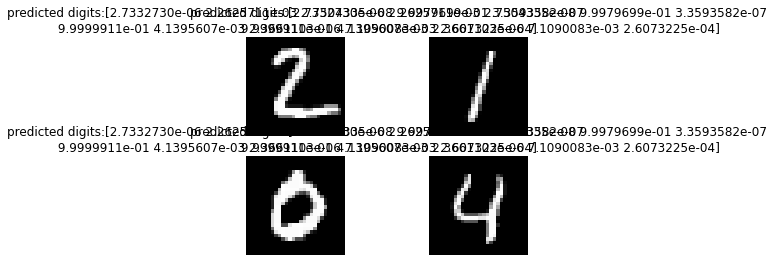

In [49]:
images = test_images[1:5]
images = images.reshape(images.shape[0],28,28)
print('test images array shape :{}'.format(images.shape))
for i, test_image in enumerate(images,start=1):
    org_image=test_image
    test_image=test_image.reshape(1,28,28,1)
    prediction=model.predict(test_image,verbose=0)
    
    print('predicted digits : {}'.format(model_pred[0]))
    
    plt.subplot(220+i)
    
    plt.axis('off')
    
    
    plt.title("predicted digits:{}".format(model_pred[0]))
    
    
    plt.imshow(org_image,cmap=plt.get_cmap('gray'))
    
    
plt.show()    

In [50]:
model.save('tf-cnn-model.h5')

In [51]:
loaded_model = models.load_model('tf-cnn-model.h5')

prediction of model : [1.0000000e+00 1.5818130e-06 4.7434308e-04 1.2301131e-05 7.0971642e-03
 8.3521445e-05 3.4410246e-02 4.2827143e-03 5.5246874e-06 1.8974544e-02]


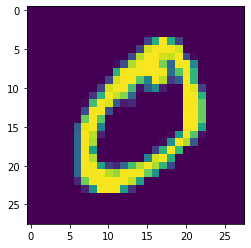

In [57]:
image = (train_images[1]).reshape(1,28,28,1)
model_pred = loaded_model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))

prediction of model : [6.6334520e-09 1.0022489e-01 3.2763287e-02 5.2780160e-07 1.0000000e+00
 8.5352948e-03 4.8493817e-03 7.7326185e-05 3.6782406e-02 3.2696307e-02]


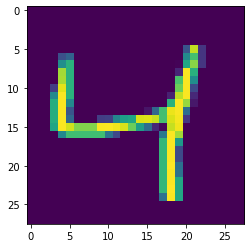

In [56]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = loaded_model.predict(image,verbose=0)
plt.imshow(image.reshape(28,28))
print('prediction of model : {}'.format(model_pred[0]))